# Using EDA and Machine Learning to Predict Heart Disease

Task:
    
    Given various parameters about a patient, can we predict whether or not they have heart disease?

**In this notebook we are going to perform Exploratory Data Analysis and use various Machine Learning Models to predict whether the patient has heart disease or not depending on the values of various features. I will be using Bokeh and a little bit of Seaborn to plot the graphs.**

**Please Upvote if you like the notebook and do provide your valuable feedback.**

#### Loading the libraries

In [1]:
import numpy as np 
import pandas as pd

#### Loading the dataset

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Features

Let's have a look at what each of these columns means:

1. **age** -> Age of the person.
2. **sex** -> Sex of the person.  (1 = male; 0 = female)
3. **cp** -> Chest Pain Type. It can take values of 0, 1, 2, 3.
4. **trestbps** -> Resting Blood Presssure (Measured in mm Hg on admission to the hospital). It can take continuous values from 94 to 200.  
5. **chol** -> Serum Cholestrol in mg/dl. It also takes continuous values.
6. **fbs** -> Fasting Blood Sugar. It can take value of either 1 or 0.
7. **restecg** -> Resting Electrocardiographic Results. It can take value of 0, 1 or 2.
8. **thalach** -> Maximum Heart Rate achieved. It can take continuous value from 71 to 202.
9. **exang** -> Exercise Induced Angina. It can take value either of 0 or 1.
10. **oldpeak** -> ST depression induced by exercise relative to rest. It takes continuous decimal values.
11. **slope** -> the slope of the peak exercise ST segment. It can take value of either 0, 1 or 2.
12. **ca** -> Number of major vessels colored by flourosopy. It can take value of either 0, 1, 2, 3 or 4. 
13. **thal** -> 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **target** -> Indicates the presence or absence of heart disease. (= the predicted attribute)

For performing EDA, I will be using [Bokeh](https://bokeh.org).

In [5]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from math import pi

In [6]:
output_notebook()

Loading BokehJS ...

# 1. Is Dataset Balanced ?

The first step before we start performing EDA, preprocessing the data, building the ML model is to check whether the variable to predict i.e 'target' is balanced or not. By checking this we can get to know which evaluation metrics will be better suited for this particular dataset.

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
df['target'].value_counts()[0]

138

In [9]:
unique = ["0", '1']
top = [df['target'].value_counts()[0], df['target'].value_counts()[1]]
source = ColumnDataSource(data = dict(Target = unique, counts = top, color = Spectral6))

In [10]:
p = figure(
    x_range = unique,
    plot_height = 500,
    plot_width = 500,
    x_axis_label = 'Target',
    y_axis_label = 'Count(Target)',
    title = 'Count of People Having Heart Disease and Not Having Heart Disease',
    tools = "hover", tooltips="@Target: @counts"
)

p.vbar(
    x = 'Target',
    top = 'counts',
    bottom = 0,
    width = 0.9,
    source = source,
    color = 'color'
)

GlyphRenderer(id='1027', ...)

In [11]:
target = {
            'No Heart Disease' : df['target'].value_counts()[0], 
          'Have Heart Disease' : df['target'].value_counts()[1]
         }

data = pd.Series(target).reset_index(name = 'value').rename(columns = {'index':'target'})
data['angle'] = data['value']/data['value'].sum() * 2 * pi
data['color'] = ['skyblue', 'salmon']

In [12]:
p1 = figure(
            plot_height = 500, 
            plot_width = 500, 
            title = "Proportion of People Having Heart Disease and not Having Heart Disease", 
            toolbar_location = None,
            tools = "hover", 
            tooltips = "@target: @value", 
            x_range = (-0.5, 1.0)
            )

p1.wedge(
        x = 0, y = 1, radius = 0.4,
        start_angle = cumsum('angle', include_zero=True), 
        end_angle = cumsum('angle'),
        line_color = "white", 
        fill_color = 'color', 
        legend_field = 'target', 
        source = data
        )

p1.legend.location = "top_right"

p1.legend.label_text_font_size = '5pt'

In [13]:
show(gridplot([[p], [p1]]))

In [14]:
print("Percentage of people having Heart Disease", round(df['target'].value_counts()[1] / (df['target'].value_counts()[0] + df['target'].value_counts()[1]), 2) * 100)
print("Percentage of people not having Heart Disease", round(df['target'].value_counts()[0] / (df['target'].value_counts()[0] + df['target'].value_counts()[1]), 2) * 100)

Percentage of people having Heart Disease 54.0
Percentage of people not having Heart Disease 46.0


We can see that the dataset is balanced as there is no major difference between the proportion of people having heart disease and those not having heart disease.

Next we need to check whether there are null values present in the dataset.

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So we don't have any null values present which saves us a lot of time :)

# 2. Exploratory Data Analysis(EDA)

First let's classify these columns as Catergorical or Continuous. For Categorical variables we will print out the unique categories for that particular column.

In [16]:
categorical_var = []
continuous_var = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        print(f"{column} : {df[column].unique()}")
        categorical_var.append(column)
        print()
    else:
        continuous_var.append(column)
        
print("Categorical Variables are: ", categorical_var)
print("Continuous Variables are: ", continuous_var)

sex : [1 0]

cp : [3 2 1 0]

fbs : [1 0]

restecg : [0 1 2]

exang : [0 1]

slope : [0 2 1]

ca : [0 2 1 3 4]

thal : [1 2 3 0]

target : [1 0]

Categorical Variables are:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables are:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


**Now we will explore the relation of these categorical variables with the target.**

In [17]:
def count_of_each_category(column_name):
    """
    A function which will plot the count of each category for a particular column using bokeh.
    """
    values = {}
    for i in df[column_name].value_counts().index:
        values[i] = df[column_name].value_counts()[i]
    column = list(values.keys())
    top = list(values.values())
    source = ColumnDataSource(data = dict(Classes = column, counts = top, color = Spectral6))

    p2 = figure(
        plot_height = 400,
        plot_width = 400,
        x_axis_label = column_name,
        y_axis_label = 'Count(Classes)',
        tools="hover", tooltips="@Classes: @counts"
    )

    p2.vbar(
        x = 'Classes',
        top = 'counts',
        bottom = 0,
        width = 0.9,
        source = source,
        color = 'color'
    )
    
    return p2
    

### Sex vs Target

In [18]:
p2 = count_of_each_category('sex')
show(p2)

In [19]:
# For analyzing how much proportion of male or female have heart disease. 

sex_vs_target = df.groupby(['sex', 'target'])['sex'].count().to_list()

unique = [0, 1]
condition = ['Have Heart Disease', 'No Heart Disease']
colors = ["#e84d60", "#718dbf"]
data = {
        'Classes' : unique,
        'Have Heart Disease' : [sex_vs_target[1], sex_vs_target[3]],
        'No Heart Disease'   : [sex_vs_target[0], sex_vs_target[2]]
        }

p3 = figure(plot_height = 400, plot_width = 400, title = "Sex vs Target",
           )

p3.vbar_stack(condition, x ='Classes', width = 0.9, color = colors, source = data,
             legend_label = condition)

p3.legend.location = "top_left"

p3.legend.label_text_font_size = '7pt'
show(p3)

We might think that more number of men have heart disease but if we observe closely, we can see that more proportion of female have heart disease as compared to men.

### Chest Pain vs Target

Different Chest Pain Types:

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease


In [20]:
p4 = count_of_each_category('cp')
show(p4)

In [21]:
# For analyzing what proportion of different chest pain types patient have heart disease. 

cp_vs_target = df.groupby(['cp', 'target'])['cp'].count().to_list()

unique = [0, 1, 2, 3]
condition = ['Have Heart Disease', 'No Heart Disease']
colors = ["#e84d60", "#718dbf"]
data = {
        'Classes' : unique,
        'Have Heart Disease' : [cp_vs_target[1], cp_vs_target[3], cp_vs_target[5],cp_vs_target[7]],
        'No Heart Disease'   : [cp_vs_target[0], cp_vs_target[2], cp_vs_target[4], cp_vs_target[6]]
        }

p5 = figure(plot_height = 400, plot_width = 400, title = "Chest Pain vs Target")

p5.vbar_stack(condition, x ='Classes', width = 0.9, color = colors, source = data, legend_label = condition)

p5.legend.location = "top_right"

p5.legend.label_text_font_size = '7pt'
show(p5)

It's really shocking to know that majority of the asymptomatic (Type 3) cases and Non-anginal pain patients (Type 2) ended up having heart disease.

### Fasting Blood Sugar vs Target 

FBS > 120 mg/dl (1 = true; 0 = false). 

Those whose Fasting Blood Sugar is greater than 120 indicates that the patient is diabetic.

In [22]:
p6 = count_of_each_category('fbs')
show(p6)

In [23]:
# For analyzing how much proportion of diabetic and non-diabetic patients have heart disease. 

fbs_vs_target = df.groupby(['fbs', 'target'])['fbs'].count().to_list()

unique = [0, 1]
condition = ['Have Heart Disease', 'No Heart Disease']
colors = ["#e84d60", "#718dbf"]
data = {
        'Classes' : unique,
        'Have Heart Disease' : [fbs_vs_target[1], fbs_vs_target[3]],
        'No Heart Disease'   : [fbs_vs_target[0], fbs_vs_target[2]]
        }

p7 = figure(plot_height = 400, plot_width = 400, title = "Fasting Blood Sugar vs Target")

p7.vbar_stack(condition, x ='Classes', width = 0.9, color = colors, source = data, legend_label = condition)

p7.legend.location = "top_right"

p7.legend.label_text_font_size = '7pt'
show(p7)

### Restecg vs Target

0: Nothing to note

1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber


In [24]:
p8 = count_of_each_category('restecg')
show(p8)

In [25]:
restecg_vs_target = df.groupby(['restecg', 'target'])['restecg'].count().to_list()

unique = [0, 1, 2]
condition = ['Have Heart Disease', 'No Heart Disease']
colors = ["#e84d60", "#718dbf"]
data = {
        'Classes' : unique,
        'Have Heart Disease' : [restecg_vs_target[1], restecg_vs_target[3], restecg_vs_target[5]],
        'No Heart Disease'   : [restecg_vs_target[0], restecg_vs_target[2], restecg_vs_target[4]]
        }

p9 = figure(plot_height = 400, plot_width = 400, title = "Restecg vs Target")

p9.vbar_stack(condition, x ='Classes', width = 0.9, color = colors, source = data, legend_label = condition)

p9.legend.location = "top_right"

p9.legend.label_text_font_size = '7pt'
show(p9)

A large proportion of people having restecg of type 1 actually have heart disease. We must take care of ST-T Wave abnormality as it can range from mild symptoms to severe problems.

### Exercise Induced Angina vs Target

exang means exercise induced angina (1 = yes; 0 = no). Angina is a type of chest pain caused by reduced blood flow to the heart

In [26]:
p10 = count_of_each_category('exang')
show(p10)

In [27]:
exang_vs_target = df.groupby(['exang', 'target'])['exang'].count().to_list()

unique = [0, 1]
condition = ['Have Heart Disease', 'No Heart Disease']
colors = ["#e84d60", "#718dbf"]
data = {
        'Classes' : unique,
        'Have Heart Disease' : [restecg_vs_target[1], restecg_vs_target[3]],
        'No Heart Disease'   : [restecg_vs_target[0], restecg_vs_target[2]]
        }

p11 = figure(plot_height = 400, plot_width = 400, title = "Exang vs Target")

p11.vbar_stack(condition, x ='Classes', width = 0.9, color = colors, source = data, legend_label = condition)

p11.legend.location = "top_right"

p11.legend.label_text_font_size = '7pt'
show(p11)

### Slope vs Target

slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

In [28]:
p12 = count_of_each_category('slope')
show(p12)

In [29]:
slope_vs_target = df.groupby(['slope', 'target'])['slope'].count().to_list()

unique = [0, 1, 2]
condition = ['Have Heart Disease', 'No Heart Disease']
colors = ["#e84d60", "#718dbf"]
data = {
        'Classes' : unique,
        'Have Heart Disease' : [slope_vs_target[1], slope_vs_target[3], slope_vs_target[5]],
        'No Heart Disease'   : [slope_vs_target[0], slope_vs_target[2], slope_vs_target[4]]
        }

p13 = figure(plot_height = 400, plot_width = 400, title = "Slope vs Target")

p13.vbar_stack(condition, x ='Classes', width = 0.9, color = colors, source = data, legend_label = condition)

p13.legend.location = "top_left"

p13.legend.label_text_font_size = '5pt'
show(p13)

As type 2 means Downslopins which is a sign of unhealthy heart, most patients with type 2 slope had Heart Disease.

### Ca vs Target

ca - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through

the more blood movement the better (no clots)

In [30]:
p14 = count_of_each_category('ca')
show(p14)

In [31]:
ca_vs_target = df.groupby(['ca', 'target'])['ca'].count().to_list()

unique = [0, 1, 2, 3, 4]
condition = ['Have Heart Disease', 'No Heart Disease']
colors = ["#e84d60", "#718dbf"]
data = {
        'Classes' : unique,
        'Have Heart Disease' : [ca_vs_target[1], ca_vs_target[3], ca_vs_target[5], ca_vs_target[7], ca_vs_target[9]],
        'No Heart Disease'   : [ca_vs_target[0], ca_vs_target[2], ca_vs_target[4], ca_vs_target[6], ca_vs_target[8]]
        }

p15 = figure(plot_height = 400, plot_width = 400, title = "Ca vs Target")

p15.vbar_stack(condition, x ='Classes', width = 0.9, color = colors, source = data, legend_label = condition)
p15.legend.location = "top_right"

p15.legend.label_text_font_size = '7pt'
show(p15)

We can see a large proportion of patients having 'ca' value of type 0 and type 4 had Heart Disease.

**Now we will see the relation of the Continuous Variables with the target.**

In [32]:
def plot_cont_var(column_name):
    """
    A function which makes histogram for continuous variables.
    """
    hist1, edges1 = np.histogram(df[df["target"] == 0][column_name], density = True, bins = 40)
    hist2, edges2 = np.histogram(df[df["target"] == 1][column_name], density = True, bins = 40)

    p = figure(
        plot_height = 500,
        plot_width = 500,
        x_axis_label = column_name,
        title = column_name.capitalize() + ' vs Target'
    )

    p.quad(
        bottom = 0,
        top = hist1,
        left = edges1[:-1],
        right = edges1[1:],
        line_color = 'white',
        color = 'blue', # Blue represents patients not having heart disease.
        alpha = 0.6
    )

    p.quad(
        bottom = 0,
        top = hist2,
        left = edges2[:-1],
        right = edges2[1:],
        line_color = 'white',
        color = 'red', # Red represents patients having heart disease.
        alpha = 0.6
    )



    return p



### Age vs Target

In [33]:
p16 = plot_cont_var('age')
show(p16)

There is no particular age at which the person is more prone to having heart disease, which proves that age is just a number.

In [34]:
continuous_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Resting Blood Pressure vs Target

Resting Blood Pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

In [35]:
p17 = plot_cont_var('trestbps')
show(p17)

Those patients having Blood Pressure in the range of 120 to 160 have the highest chance of having heart disease

###  Cholestoral vs Target

In [36]:
p18 = plot_cont_var('chol')
show(p18)

We can see that patient having Cholestrol level greater than 200 had heart disease.

### Thalach vs Target

maximum heart rate achieved

In [37]:
p19 = plot_cont_var('thalach')
show(p19)

The patients having maximum heart rate greater than 150 are at a greater risk of having heart disease.

# 3. Correlation Matrix

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# I have used seaborn for plotting correlation matrix as its 
# much faster and much more easier than bokeh 

(14.5, -0.5)

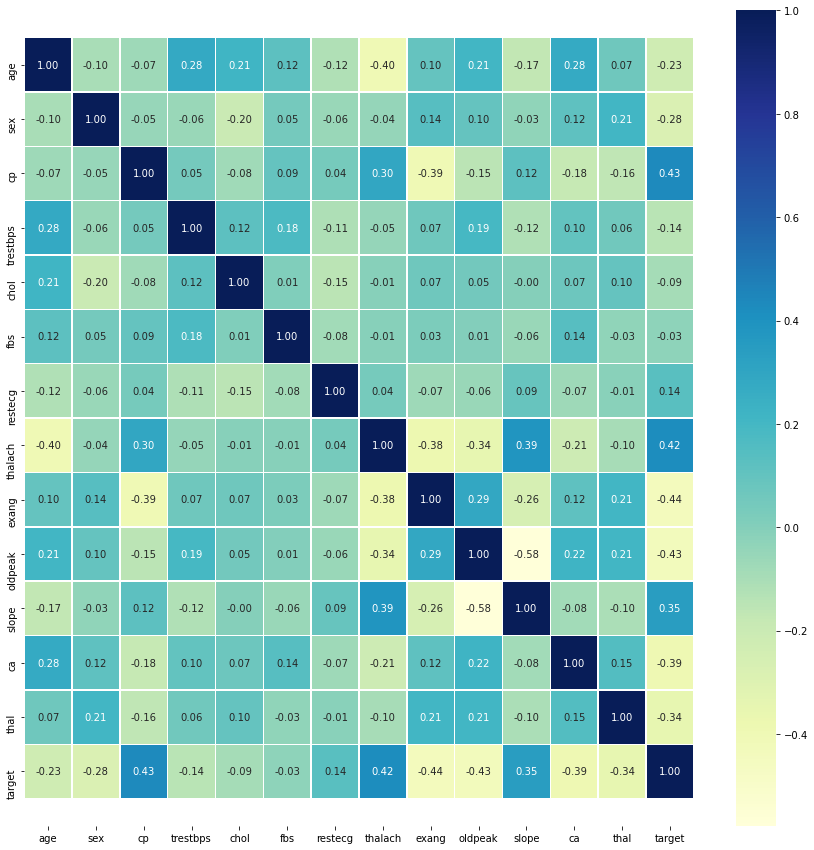

In [39]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The correlation between the features with target is not that clear in the correlation matrix as there are a large number of features, lets visualize it in another way.

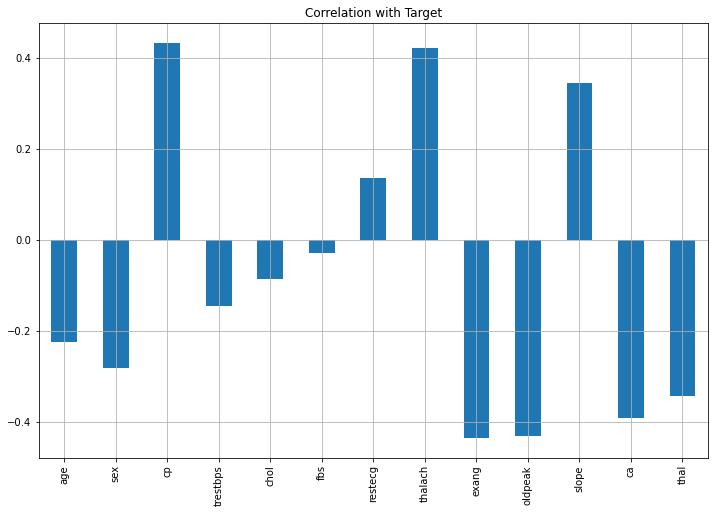

In [40]:
df.drop('target', axis=1).corrwith(df.target).plot(kind = 'bar', grid = True, 
                                                   figsize = (12, 8), 
                                                   title = "Correlation with Target")

We can see that 'fbs' and 'chol' are least related with 'target' whereas other features are highly correlated with the 'target' variable.

# 3. Data Pre-processing

As we can see that there a number of continuous variables, we need to scale the data so that the continuous variables don't get majority of the weight or in other words, become the deciding factor to predict whether the patient has heart disease. We would also need to convert some categorical variable into dummy variables.

In [41]:
from pandas import get_dummies

categorical_var.remove('target') # Removing the 'target' column from the list of categorical variables.
dataframe = pd.get_dummies(df, columns = categorical_var)

In [42]:
dataframe.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [43]:
dataframe.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

Before we scale the data, we need to split the data into train and test. We can not apply scaling before splitting because test set is the real world data which the trained model would have never seen. Therefore, we will scale the test data according to the train data

In [44]:
X = dataframe.drop('target', axis = 1)
y = dataframe['target']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
X_train_std = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train_std

array([[ 0.35256528,  0.02020565, -0.43596979, ..., -0.27537136,
        -1.08751658,  1.28044324],
       [-0.31068598, -1.1409796 , -0.32539421, ..., -0.27537136,
         0.91952621, -0.78097956],
       [-0.08960223,  1.06527237, -0.28853568, ..., -0.27537136,
        -1.08751658,  1.28044324],
       ...,
       [ 0.13148153, -0.6765055 , -1.00727693, ..., -0.27537136,
        -1.08751658,  1.28044324],
       [-0.86339537,  0.36856122,  0.17219589, ..., -0.27537136,
         0.91952621, -0.78097956],
       [ 0.35256528, -0.6765055 ,  0.66978598, ..., -0.27537136,
         0.91952621, -0.78097956]])

In [49]:
X_test

array([[ 1.67906782,  0.77497606, -1.35743293, ..., -0.27537136,
        -1.08751658,  1.28044324],
       [ 1.01581655,  2.22645762, -0.380682  , ..., -0.27537136,
        -1.08751658,  1.28044324],
       [ 0.46310716,  2.22645762,  0.74350304, ..., -0.27537136,
        -1.08751658,  1.28044324],
       ...,
       [ 0.02093965,  1.64586499,  0.7619323 , ..., -0.27537136,
        -1.08751658,  1.28044324],
       [ 1.12635843,  1.06527237, -0.41754052, ..., -0.27537136,
        -1.08751658,  1.28044324],
       [-0.42122786, -1.25709813, -1.33900366, ..., -0.27537136,
         0.91952621, -0.78097956]])

We can see that both X_train and X_test has been scaled. Now we can apply Machine Learning Algorithms.

# 4. Training Machine Learning Algorithms

Before we train any model, I will create a function which will help to evaluate the model.

In [50]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [51]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train_std, y_train)

evaluation(lr, X_train_std, y_train, X_test, y_test, True)
evaluation(lr, X_train_std, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 88.55%
_______________________________________________
F1 Score: 0.9
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.891089    0.880952  0.885463    0.886021      0.885641
recall       0.857143    0.909836  0.885463    0.883489      0.885463
f1-score     0.873786    0.895161  0.885463    0.884474      0.885274
support    105.000000  122.000000  0.885463  227.000000    227.000000
_______________________________________________
Confusion Matrix: 
 [[ 90  15]
 [ 11 111]]

Test Result:
Accuracy Score: 86.84%
_______________________________________________
F1 Score: 0.89
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.896552   0.851064  0.868421   0.873808      0.870815
recall      0.787879   0.930233  0.868421   0.859056      0.868421
f1-score    0.838

Through Logistic Regression we were able to achieve Training Accuracy of 88.55 % and Testing Accuracy of 86.84 %.

In [53]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train_std)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(X_train_std, y_train)

evaluation(rfc, X_train_std, y_train, X_test, y_test, True)
evaluation(rfc, X_train_std, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    105.0  122.0       1.0      227.0         227.0
_______________________________________________
Confusion Matrix: 
 [[105   0]
 [  0 122]]

Test Result:
Accuracy Score: 84.21%
_______________________________________________
F1 Score: 0.86
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.844444  0.842105   0.841577      0.841954
recall      0.787879   0.883721  0.842105   0.835800      0.842105
f1-score    0.812500   0.863636  0.842105   0.838068      0.841432
supp

Through Random Forest Classifier we were able to achieve Training Accuracy of 100 % and Testing Accuracy of 84.21 %.

In [55]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train_std)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

Now we will determine the right number of n_estimators to be used:

In [56]:
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train_std, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
print(accuracy_scores)

[0.7368421052631579, 0.8552631578947368, 0.8552631578947368, 0.8421052631578947, 0.8552631578947368, 0.8552631578947368, 0.8421052631578947, 0.8421052631578947, 0.8552631578947368, 0.8552631578947368]


We can see that having 500 number of trees gives the highest accuracy hence we have used 500 above.

### K Nearest Neighbor

In [57]:
from sklearn.neighbors import KNeighborsClassifier

Deciding the right number of Neighbors.

In [58]:
accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_std, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
print(accuracy_scores)

[0.8157894736842105, 0.7763157894736842, 0.8421052631578947, 0.8157894736842105, 0.8421052631578947, 0.8289473684210527, 0.8289473684210527, 0.8552631578947368, 0.8289473684210527]


For now we will take the number of neighbors to be 9. 

In [59]:
knn = KNeighborsClassifier(n_jobs = 9)
knn.fit(X_train_std, y_train)

evaluation(knn, X_train_std, y_train, X_test, y_test, True)
evaluation(knn, X_train_std, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 87.22%
_______________________________________________
F1 Score: 0.89
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.895833    0.854962  0.872247    0.875398      0.873867
recall       0.819048    0.918033  0.872247    0.868540      0.872247
f1-score     0.855721    0.885375  0.872247    0.870548      0.871659
support    105.000000  122.000000  0.872247  227.000000    227.000000
_______________________________________________
Confusion Matrix: 
 [[ 86  19]
 [ 10 112]]

Test Result:
Accuracy Score: 84.21%
_______________________________________________
F1 Score: 0.87
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.862069   0.829787  0.842105   0.845928      0.843804
recall      0.757576   0.906977  0.842105   0.832276      0.842105
f1-score    0.80

In [60]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train_std)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

### Support Vector Machine

In [61]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train_std, y_train)

evaluation(svm, X_train_std, y_train, X_test, y_test, True)
evaluation(svm, X_train_std, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 97.36%
_______________________________________________
F1 Score: 0.98
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.980583    0.967742  0.973568    0.974162      0.973681
recall       0.961905    0.983607  0.973568    0.972756      0.973568
f1-score     0.971154    0.975610  0.973568    0.973382      0.973549
support    105.000000  122.000000  0.973568  227.000000    227.000000
_______________________________________________
Confusion Matrix: 
 [[101   4]
 [  2 120]]

Test Result:
Accuracy Score: 84.21%
_______________________________________________
F1 Score: 0.86
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.800000   0.878049  0.842105   0.839024      0.844159
recall      0.848485   0.837209  0.842105   0.842847      0.842105
f1-score    0.82

In [62]:
train_score_svm = round(accuracy_score(y_train, svm.predict(X_train_std)) * 100, 2)
test_score_svm = round(accuracy_score(y_test, svm.predict(X_test)) * 100, 2)

### Summary

In [63]:
models = {
           'Train Accuracy': [train_score_lr, train_score_rfc, train_score_knn, train_score_svm],
          'Test Accuracy' : [test_score_lr, test_score_rfc, test_score_knn, test_score_svm]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Random Forest Classifier', 'K-Nearest Neighbor', 'Support Vector Machine'])

In [64]:
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,88.55,86.84
Random Forest Classifier,100.00,84.21
K-Nearest Neighbor,87.22,84.21
Support Vector Machine,97.36,84.21


# 5. Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression with Hyperparameter Tuning

In [66]:
params = {
        "C": np.logspace(-4, 4, 20), # For Regularization
          "solver": ["liblinear"]}

lr = LogisticRegression()

lr_cv = GridSearchCV(lr, params, scoring = "accuracy", n_jobs = -1, verbose = 1, cv = 5)

In [67]:
lr_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [68]:
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 0.004832930238571752, 'solver': 'liblinear'}


In [69]:
lr = LogisticRegression(**best_params)

lr.fit(X_train_std, y_train)

evaluation(lr, X_train_std, y_train, X_test, y_test, True)
evaluation(lr, X_train_std, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 85.02%
_______________________________________________
F1 Score: 0.86
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.838095    0.860656   0.85022    0.849375       0.85022
recall       0.838095    0.860656   0.85022    0.849375       0.85022
f1-score     0.838095    0.860656   0.85022    0.849375       0.85022
support    105.000000  122.000000   0.85022  227.000000     227.00000
_______________________________________________
Confusion Matrix: 
 [[ 88  17]
 [ 17 105]]

Test Result:
Accuracy Score: 84.21%
_______________________________________________
F1 Score: 0.86
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.818182   0.860465  0.842105   0.839323      0.842105
recall      0.818182   0.860465  0.842105   0.839323      0.842105
f1-score    0.81

In [70]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train_std)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

### K-nearest neighbors with Hyperparameter Tuning

In [71]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_std, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train_std)))

Maximum KNN score on the train data: 100.00%


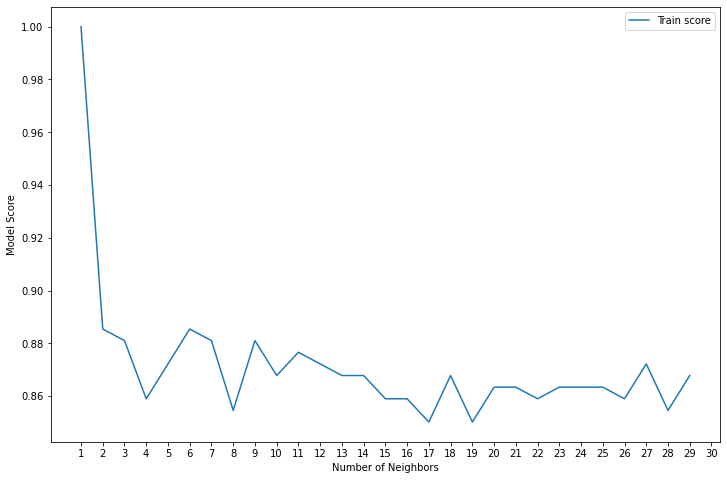

In [72]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the train data: {max(train_score)*100:.2f}%")

In [73]:
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train_std, y_train)

evaluation(knn, X_train_std, y_train, X_test, y_test, True)
evaluation(knn, X_train_std, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 87.22%
_______________________________________________
F1 Score: 0.89
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.913043    0.844444  0.872247    0.878744      0.876175
recall       0.800000    0.934426  0.872247    0.867213      0.872247
f1-score     0.852792    0.887160  0.872247    0.869976      0.871263
support    105.000000  122.000000  0.872247  227.000000    227.000000
_______________________________________________
Confusion Matrix: 
 [[ 84  21]
 [  8 114]]

Test Result:
Accuracy Score: 80.26%
_______________________________________________
F1 Score: 0.84
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.846154   0.780000  0.802632   0.813077      0.808725
recall      0.666667   0.906977  0.802632   0.786822      0.802632
f1-score    0.74